In [2]:
from xmitgcm import open_mdsdataset
import xmitgcm 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import cmocean
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import ffmpeg
from matplotlib import animation

import MITgcmutils
import math
import netCDF4 as nc
from scipy.io import savemat
import scipy as sc
import scipy.io as sio
import warnings
import datetime
warnings.filterwarnings("ignore")

In [3]:
project='Z20x15'

location='/Users/ameliaking/Proyecto/Codigo/Idealizada/ChangeDim/'

var='state'

ds=xr.open_dataset(str(location) + str(var) + '.nc')
   

In [11]:
params = {'font.size': 15,
          'figure.figsize': (20, 10),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

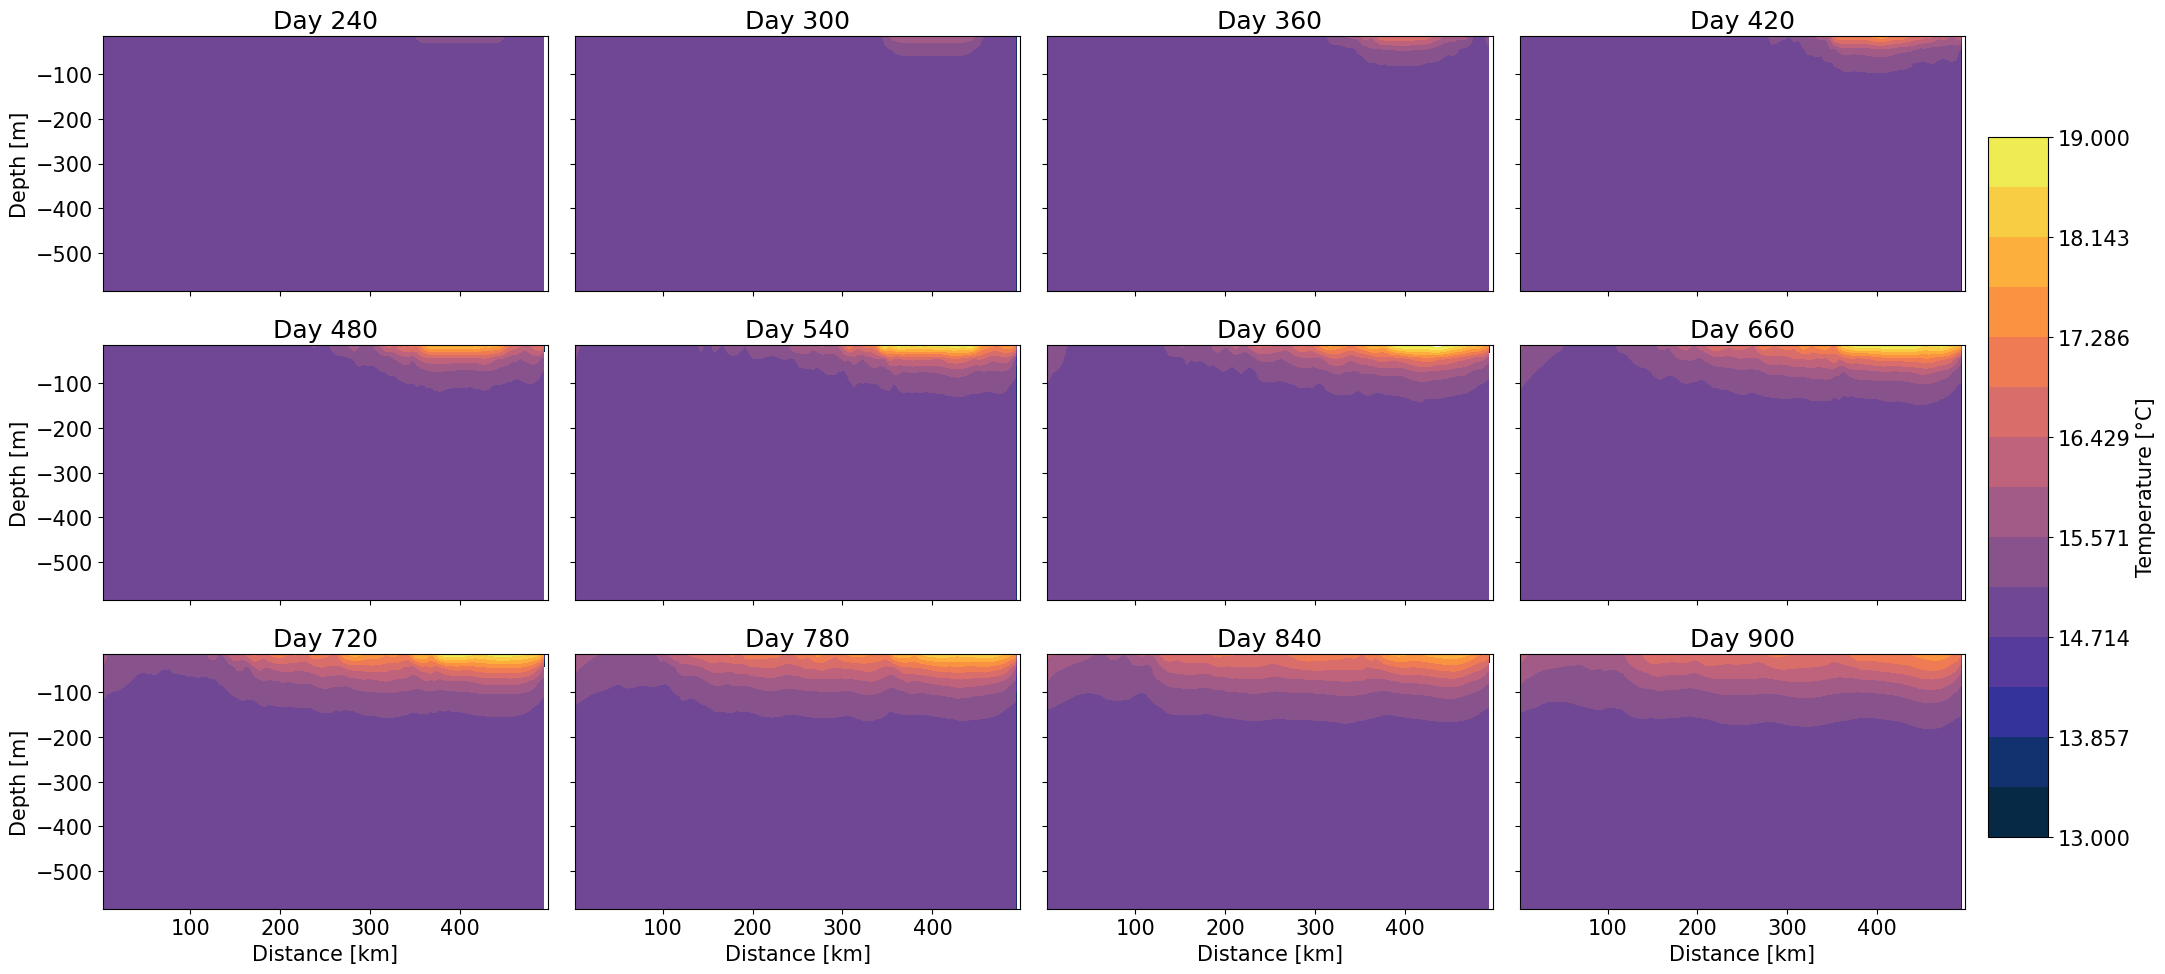

In [12]:
t=24
variable='Temp'

if variable == 'Vvel':
    varin=ds.V
    Yin=ds.Yp1
    vmin=-0.07
    vmax=0.07
    title= 'V-velocity [m/s]' #'Temperature [°C]'
    cmapi=cmocean.cm.balance
elif variable == 'Temp':
    varin=ds.Temp
    title= 'Temperature [°C]'
    Yin=ds.Y
    cmapi=cmocean.cm.thermal
    vmin=13
    vmax=19
elif variable == 'Sal':
    varin=ds.S
    title='Salinity [g/kg]'
    Yin=ds.Y
    cmapi=cmocean.cm.haline
    vmin=29
    vmax=33
elif variable == 'Uvel':
    varin=ds.U
    Yin=ds.Y
    vmin=-0.1
    vmax=0.1
    title= 'U-velocity [m/s]' #'Temperature [°C]'


levels=np.linspace(vmin,vmax,15)

fig,ax=plt.subplots(3,4)

for i in range(12):
    tin=t+(6*i)
    if i<=3:
        axin=ax[0,i]
        axin.xaxis.set_tick_params(labelbottom=False)
    elif np.logical_and(i>3,i<=7):
        axin=ax[1,i-4]
        axin.xaxis.set_tick_params(labelbottom=False)
    elif np.logical_and(i>7,i<=11):
        axin=ax[2,i-8]
        axin.set(xlabel='Distance [km]')
    if i==0 or i==8 or i==4 :
        axin.set(ylabel='Depth [m]')
    else: 
        axin.yaxis.set_tick_params(labelleft=False)


    timein=ds.T[tin]/(60*60*24)
    cax0=axin.contourf(Yin/1000, ds.Z, varin[tin,:,:,10],levels=levels,cmap=cmapi) 
    axin.set(title=f'Day {timein:.0f}')
    #plt.colorbar(cax0)

cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])
fig.colorbar(cax0, cax=cbar_ax)
cbar_ax.set_ylabel(title)

fig.tight_layout()

fig.patch.set_alpha(0.0)
plt.savefig('../Figures/' + str(project) + '/' + str(variable) + '.png', bbox_inches='tight')

In [13]:
params = {'font.size': 15,
          'figure.figsize': (20, 20),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

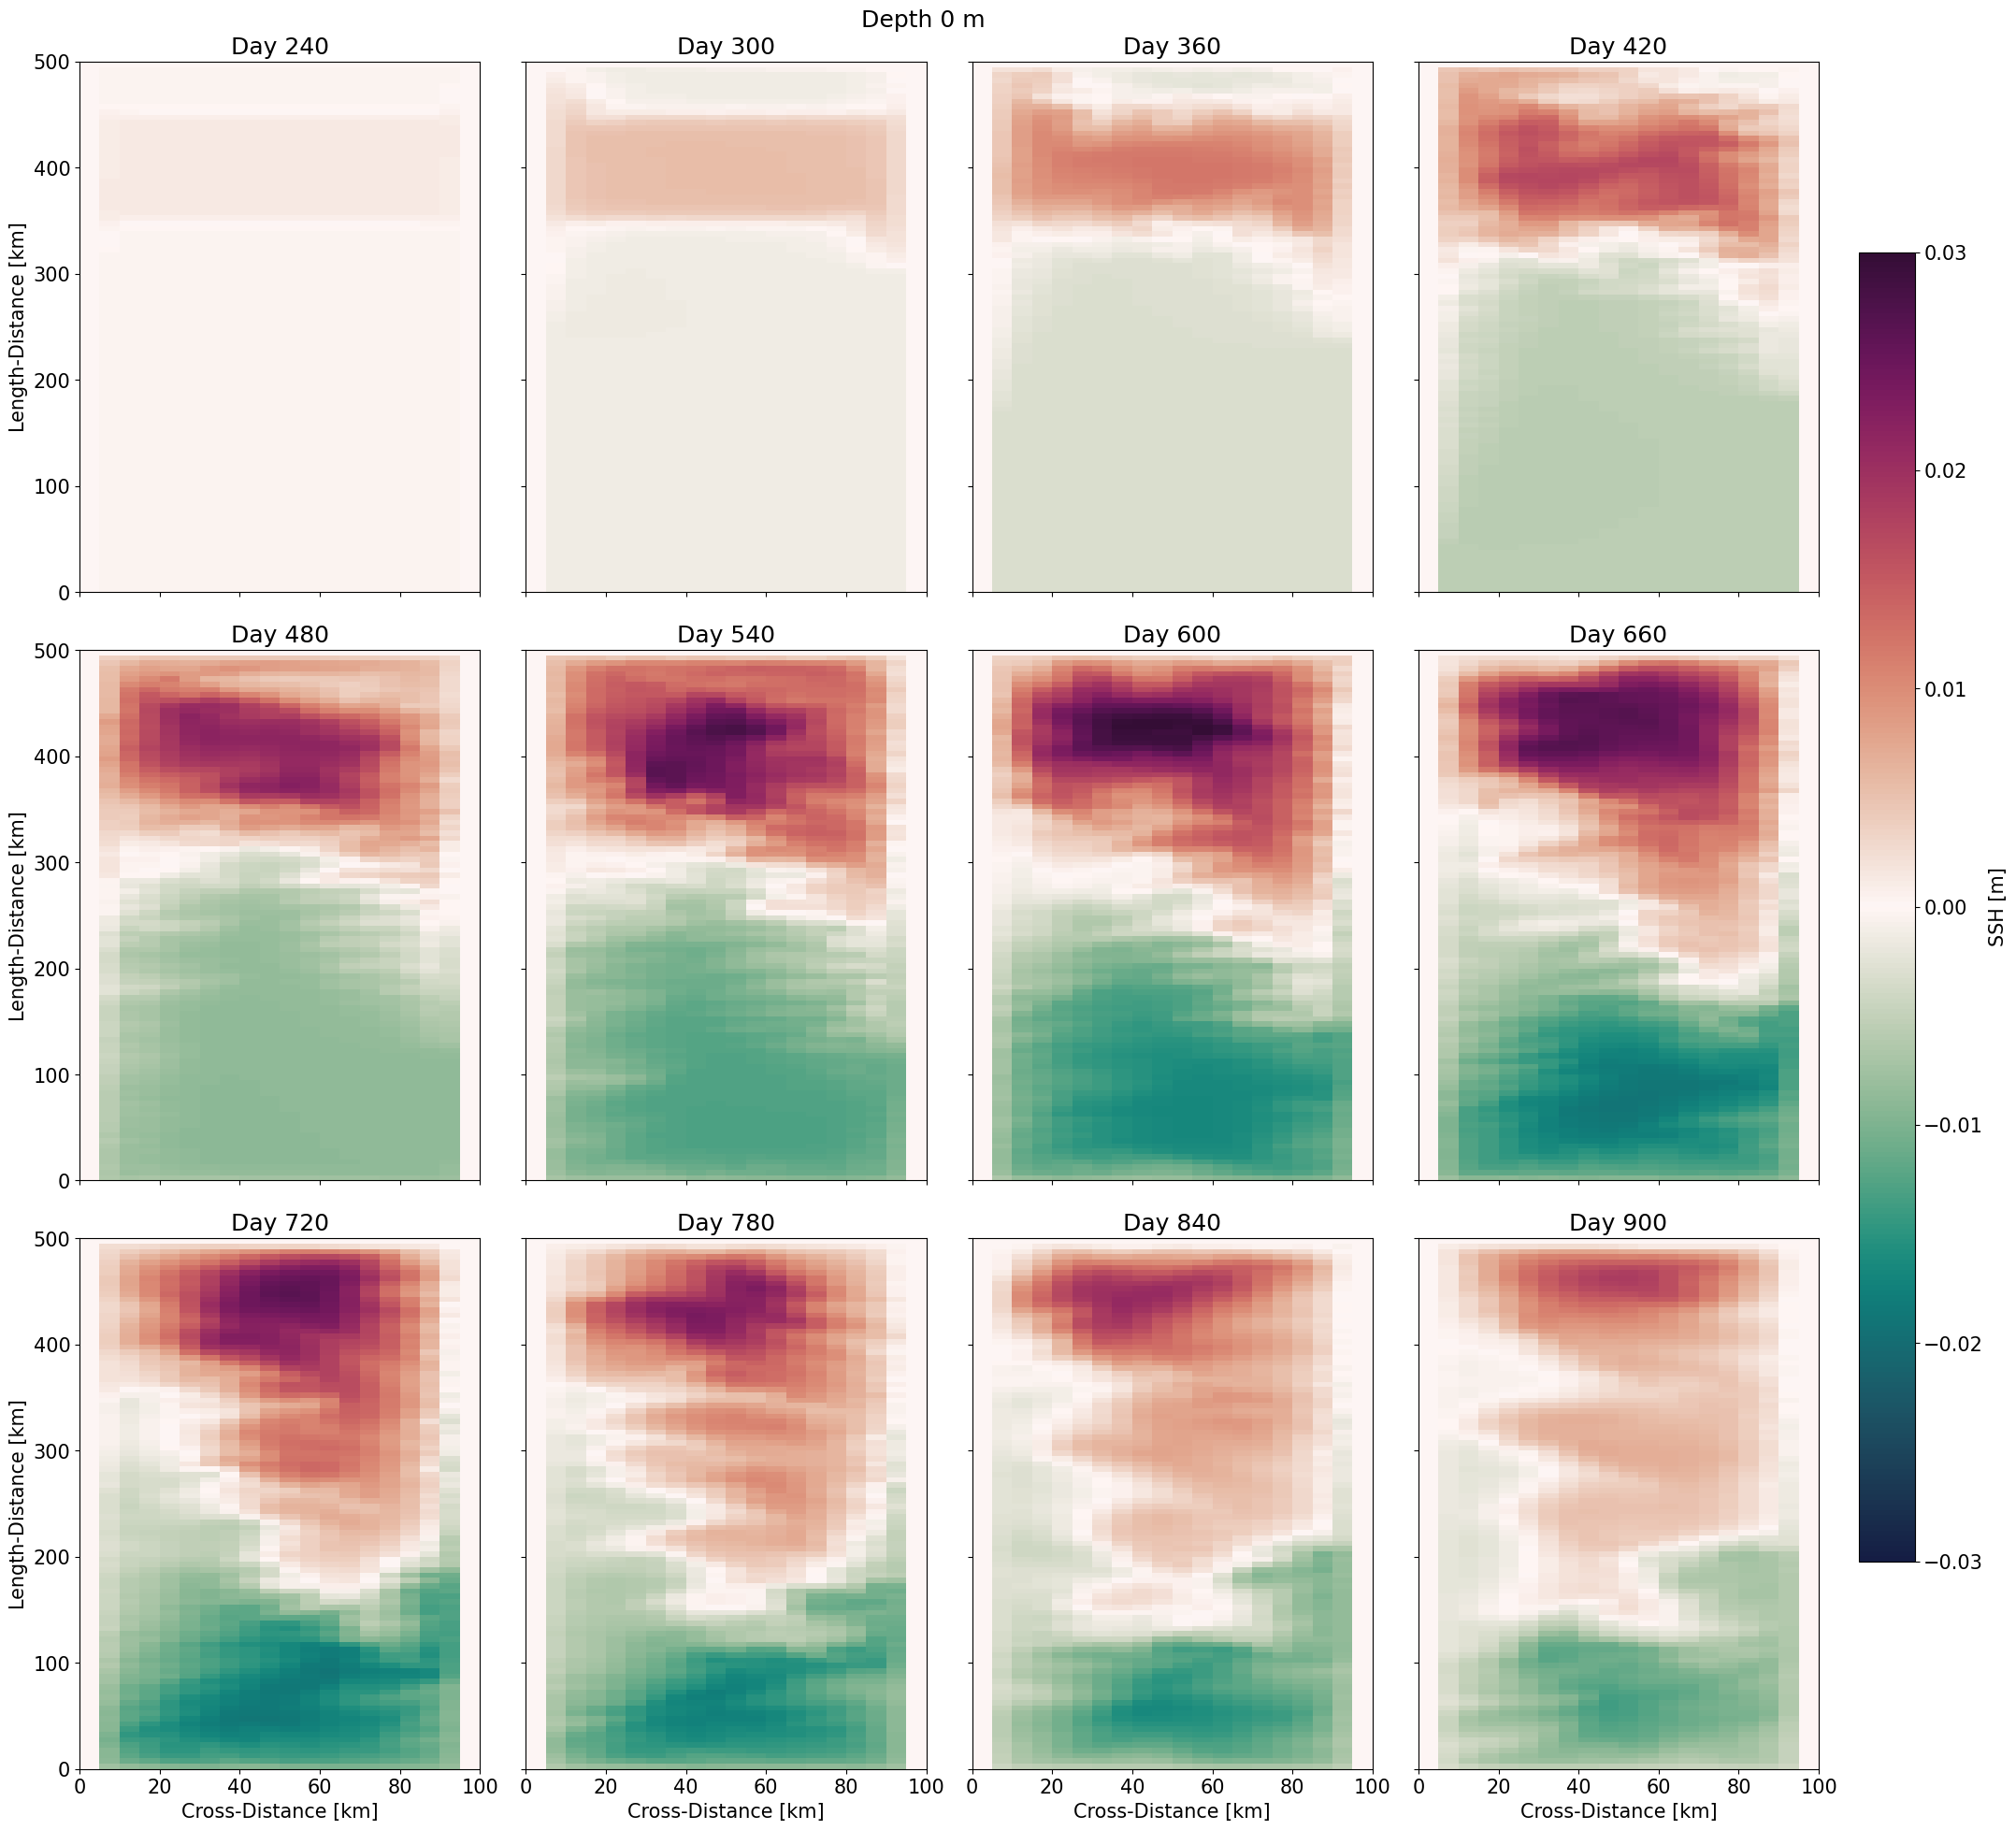

In [25]:
t=24
variable='Eta'
d=0

if variable == 'Vvel':
    varin=ds.V[:,d,:,:]
    dep=15 + d*15
    Yin=ds.Yp1
    Xin=ds.X
    vmin=-0.07
    vmax=0.07
    title= 'V-velocity [m/s]' #'Temperature [°C]'
    cmapi=cmocean.cm.balance
elif variable == 'Temp':
    varin=ds.Temp[:,d,:,:]
    title= 'Temperature [°C]'
    dep=15 + d*15
    Yin=ds.Y
    Xin=ds.X
    cmapi=cmocean.cm.thermal
    vmin=13
    vmax=19
elif variable == 'Sal':
    varin=ds.S[:,d,:,:]
    dep=15 + d*15
    title='Salinity [g/kg]'
    Yin=ds.Y
    Xin=ds.X
    cmapi=cmocean.cm.haline
    vmin=29
    vmax=33
elif variable == 'Eta':
    varin=ds.Eta
    dep=0
    title='SSH [m]'
    Yin=ds.Y
    Xin=ds.X
    cmapi=cmocean.cm.curl
    vmin=-0.03
    vmax=0.03
elif variable == 'Uvel':
    dep=15 + d*15
    varin=ds.U[:,d,:,:]
    Yin=ds.Y
    Xin=ds.Xp1
    vmin=-0.1
    vmax=0.1
    title= 'U-velocity [m/s]' #'Temperature [°C]'


levels=np.linspace(vmin,vmax,15)

fig,ax=plt.subplots(3,4)

for i in range(12):
    tin=t+(6*i)
    if i<=3:
        axin=ax[0,i]
        axin.xaxis.set_tick_params(labelbottom=False)
    elif np.logical_and(i>3,i<=7):
        axin=ax[1,i-4]
        axin.xaxis.set_tick_params(labelbottom=False)
    elif np.logical_and(i>7,i<=11):
        axin=ax[2,i-8]
        axin.set(xlabel='Cross-Distance [km]')
    if i==0 or i==8 or i==4 :
        axin.set(ylabel='Length-Distance [km]')
    else: 
        axin.yaxis.set_tick_params(labelleft=False)


    timein=ds.T[tin]/(60*60*24)
    cax0=axin.pcolormesh( Xin/1000, Yin/1000, varin[tin],vmin=vmin,vmax=vmax,cmap=cmapi) 
    axin.set(title=f'Day {timein:.0f}')
    #plt.colorbar(cax0)

cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])
fig.colorbar(cax0, cax=cbar_ax)
cbar_ax.set_ylabel(title)

fig.suptitle('Depth ' + str(dep) + ' m')
fig.tight_layout()

fig.patch.set_alpha(0.0)
plt.savefig('../Figures/' + str(project) + '/' + str(variable) +  str(dep) + 'm.png', bbox_inches='tight')

In [87]:
def animateETA(t):
    tin=t
    tt=ds.T[t].values/(60*60*24)
    print(tin)
    varin = ds.Temp[tin,:,:,10]
    

    cax.set_array(varin)
    ax.set_title(f'After {tt:.1f} hours')


In [91]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='AM'), bitrate=2000)


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
0


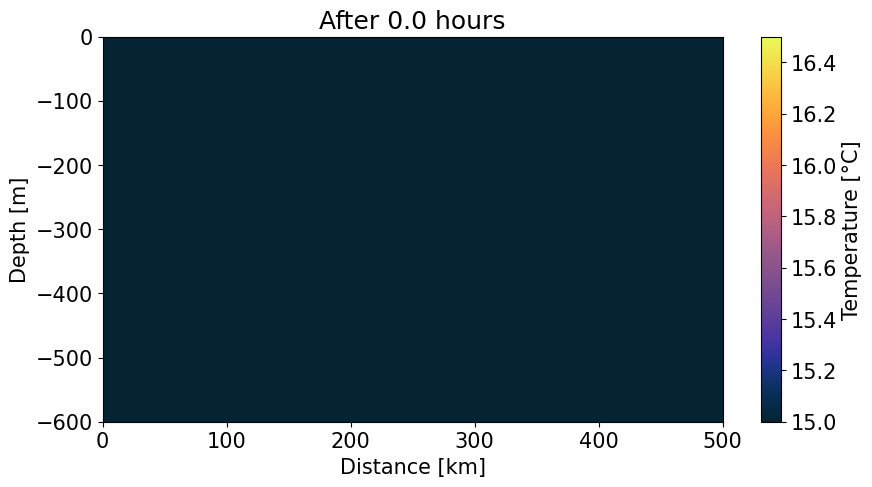

In [94]:
fig, ax = plt.subplots()
    
vmin=15
vmax=16.5
t=0
tt=ds.T[t].values/(60*60*24)
xlab='Distance [km]'
ylab='Depth [m]'
cmapi=cmocean.cm.thermal
title='Temperature [°C]'


ax.set_facecolor('wheat')
cax = ax.pcolormesh(ds.Y/1000, ds.Z,ds.Temp[t,:,:,10],cmap=cmapi,vmin=vmin,vmax=vmax)

ax.set(xlabel=xlab, ylabel=ylab)

ax.set_title(f'After {tt:.1f} hours')   
cbar = plt.colorbar(cax)
cbar.set_label(title)


anim = FuncAnimation(fig, animateETA,frames=len(ds.T), repeat=False)

anim.save('ChangeDim/Figures/Temp.mp4', writer=writer, dpi=600)